In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Ecommerce Customers.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.drop("Email",axis=1,inplace=True)

In [6]:
df.drop("Address",axis=1,inplace=True)

In [7]:
#EDA
#check null value
df.isnull().sum()

Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

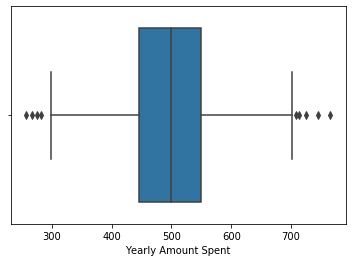

In [8]:
#check outlier
sns.boxplot(df["Yearly Amount Spent"])
plt.show()

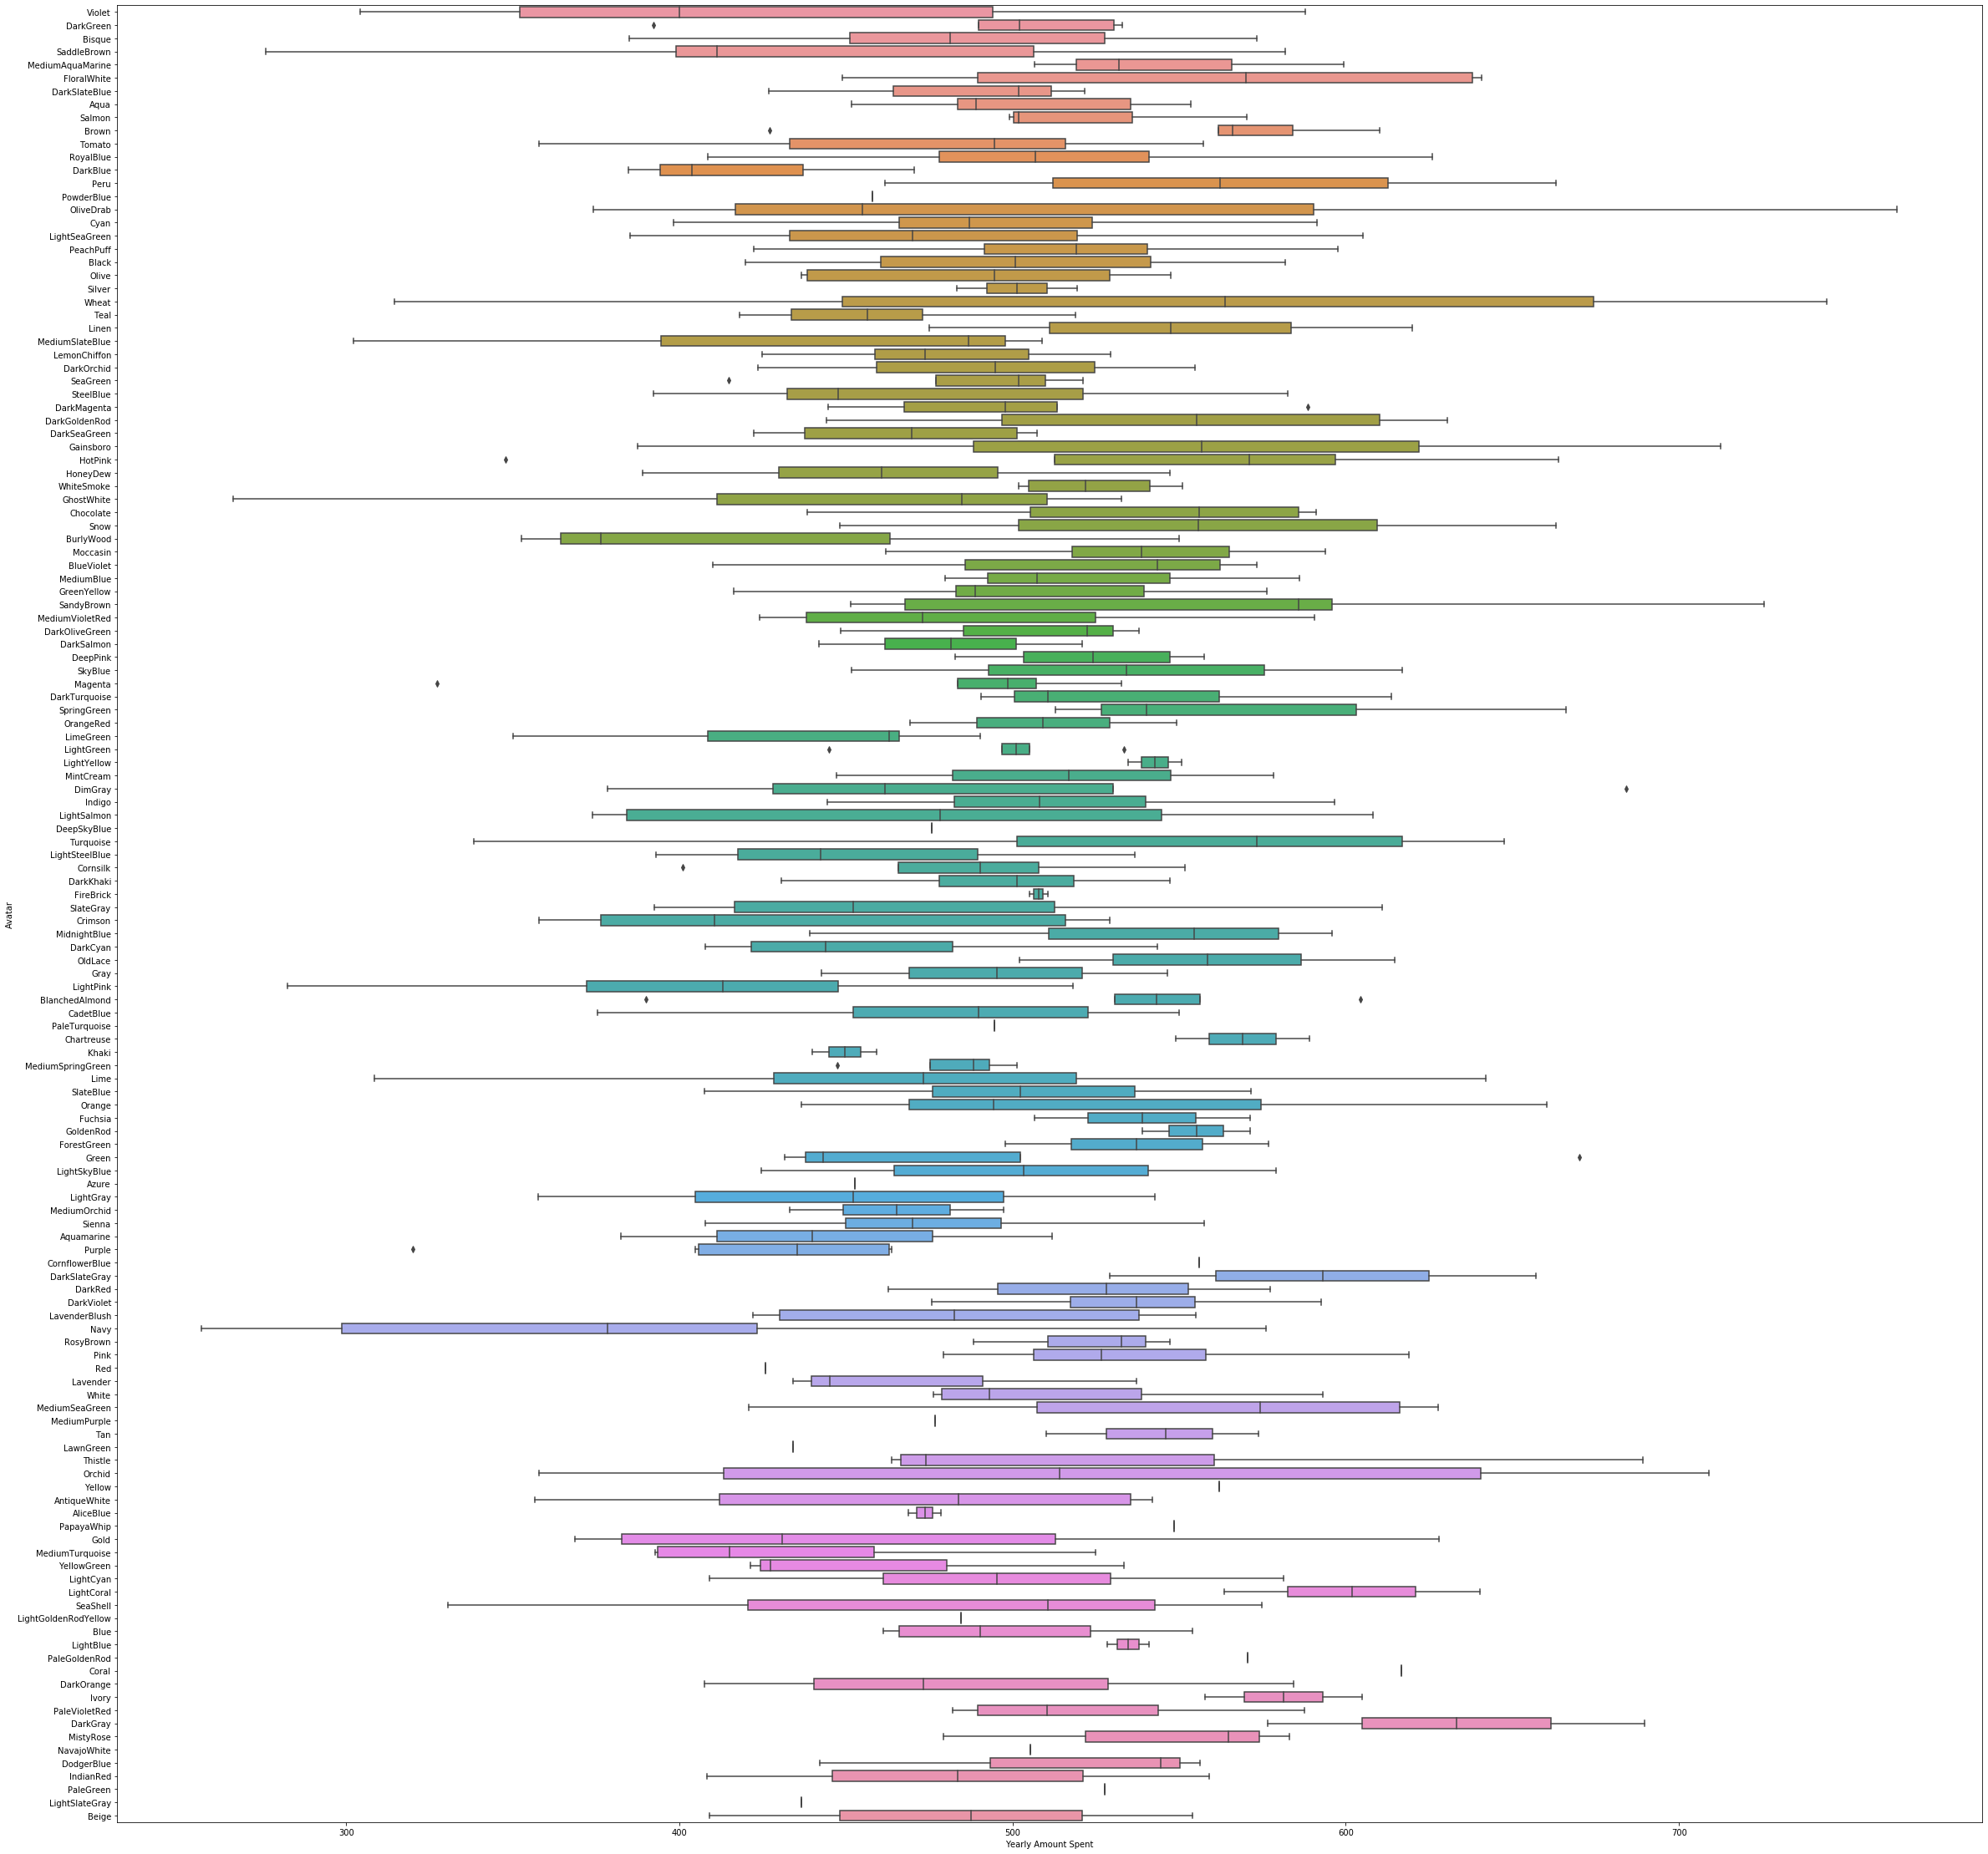

In [9]:
plt.figure(figsize=(40,40))
sns.boxplot(data=df,y="Avatar", x="Yearly Amount Spent")
plt.show()

In [10]:
df["Avatar"].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

In [11]:
df[(df["Avatar"]=="DimGray") & (df["Yearly Amount Spent"]>600)]

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
151,DimGray,32.887105,12.387184,37.431159,6.401229,684.163431


In [12]:
df[(df["Avatar"]=="Green") & (df["Yearly Amount Spent"]>600)]

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
396,Green,35.74267,10.889828,35.565436,6.115199,669.987141


In [13]:
#remove outlier
df.drop(151,inplace=True)

In [14]:
df.drop(396,inplace=True)

In [15]:
#handle categorical data
#seperate with datatypes
cat=df.select_dtypes("object")
num=df.select_dtypes("float64")

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
for col in cat:
    le=LabelEncoder()
    cat[col]=le.fit_transform(cat[[col]])

In [18]:
cat.head()

,Avatar
0,132
1,25
2,6
3,114
4,80


In [19]:
#check skewness
from scipy.stats import skew

Avg. Session Length
-0.05804294772426735


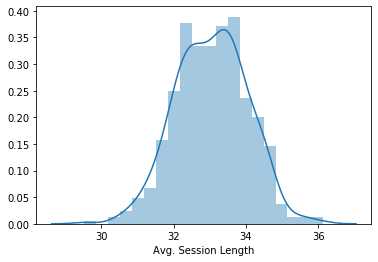

Time on App
-0.09095210596997086


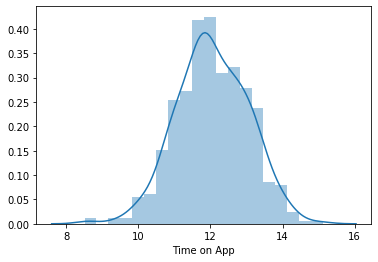

Time on Website
0.011884059415032698


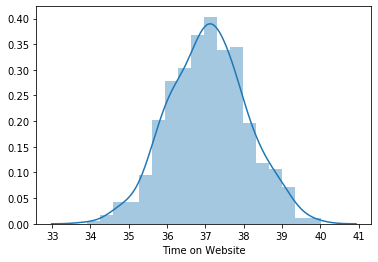

Length of Membership
-0.1633812459500493


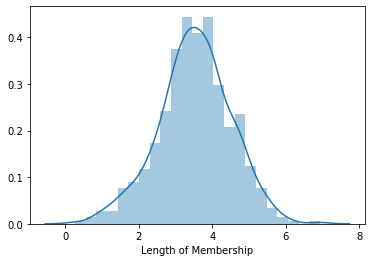

Yearly Amount Spent
0.016246505317027184


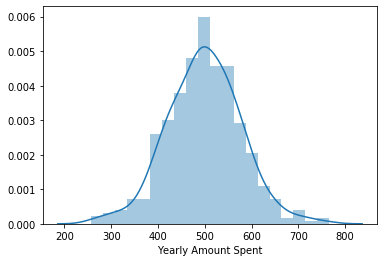

In [20]:
for i in num:
    print(i)
    print(skew(num[i]))
    plt.figure()
    sns.distplot(num[i])
    plt.show()

In [21]:
#check correlation
num.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.021546,-0.027083,0.048206,0.350278
Time on App,-0.021546,1.000000,0.078971,0.033841,0.508738
Time on Website,-0.027083,0.078971,1.000000,-0.042752,0.002072
Length of Membership,0.048206,0.033841,-0.042752,1.000000,0.804666
Yearly Amount Spent,0.350278,0.508738,0.002072,0.804666,1.000000


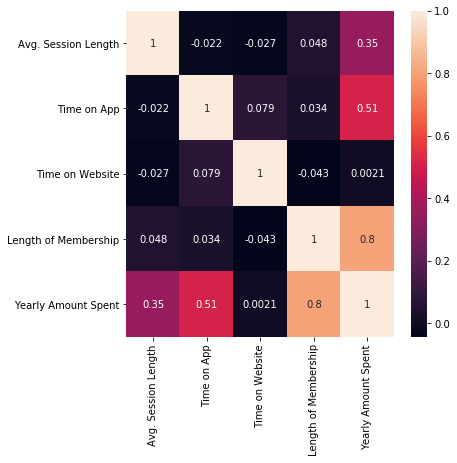

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(num.corr(),annot=True)
plt.show()

In [23]:
#concate num and cat datatype
df_new=pd.concat([num,cat],axis=1)

In [24]:
df_new.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Avatar
0,34.497268,12.655651,39.577668,4.082621,587.951054,132
1,31.926272,11.109461,37.268959,2.664034,392.204933,25
2,33.000915,11.330278,37.110597,4.104543,487.547505,6
3,34.305557,13.717514,36.721283,3.120179,581.852344,114
4,33.330673,12.795189,37.536653,4.446308,599.406092,80


In [25]:
#scaling
from sklearn.preprocessing import StandardScaler

In [26]:
for col in df_new:
    ss=StandardScaler()
    df_new[col]=ss.fit_transform(df_new[[col]])

In [27]:
df_new.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Avatar
0,1.469447,0.605293,2.492180,0.568538,1.136974,1.539307
1,-1.137574,-0.950646,0.204387,-0.871415,-1.353860,-1.068008
2,-0.047873,-0.728437,0.047460,0.590791,-0.140643,-1.530989
3,1.275049,1.673851,-0.338327,-0.408400,1.059369,1.100693
4,0.286505,0.745711,0.469656,0.937704,1.282737,0.272201


In [28]:
#seperate input feature and target
x=df_new[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
y=df_new["Yearly Amount Spent"]

In [29]:
#perform train-test-split
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [31]:
#perform linear regression
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
#train dataset
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
#check training score
lr.score(x_train,y_train)

0.9834216414241942

In [35]:
#check score of testing
lr.score(x_test,y_test)
#our data is not overfit and underfit

0.9853065207088421

In [36]:
#check coefficient
lr.coef_

array([0.32314681, 0.48887054, 0.00613066, 0.77201669])

In [37]:
#check intercept
lr.intercept_

9.769129304973423e-05

In [38]:
#test data
y_pred=lr.predict(x_test)

In [39]:
y_pred

array([-4.68983866e-01, -2.54911484e-01,  1.48703547e+00,  8.40265077e-01,
        1.41147011e+00, -5.10566050e-02, -4.14766905e-02,  1.13827044e+00,
       -1.16323127e+00,  6.94012617e-01,  2.56412506e-01,  3.40062947e+00,
        3.61385400e-01,  2.56478154e-01,  8.26346191e-01, -9.43921759e-01,
        8.13718775e-01,  6.20359853e-02, -4.96351674e-01, -4.82843723e-01,
        6.29076127e-01, -3.13787492e-01, -6.23936226e-01,  3.17898665e-01,
       -7.20684545e-01, -2.81686109e-01,  1.80707840e-01,  1.87786932e+00,
       -7.73714516e-02,  1.56372678e+00,  6.91000021e-01, -1.30082765e+00,
       -2.32854712e+00, -5.25378209e-01,  8.76290957e-01, -2.26931851e-01,
        1.18403931e+00, -2.45354565e+00, -5.97709524e-01,  1.10369225e-01,
        4.27181628e-01,  1.05345929e+00, -2.56237823e-01, -5.47312091e-01,
       -2.03460191e-01, -7.63095056e-01, -7.99810719e-01,  4.17069742e-01,
        3.18392621e-01,  6.07289958e-01, -3.00434091e-01,  1.78519775e+00,
        2.29538466e-01,  

In [40]:
from sklearn. metrics import mean_squared_error

In [41]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [42]:
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

mean_squared_error 0.015072703159005578
root_mean_squared_error 0.12277093776218205


In [43]:
#check score
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred)

0.9853065207088421

In [45]:
#check assumption of linear regression

In [46]:
#find residual
residual=y_test-y_pred

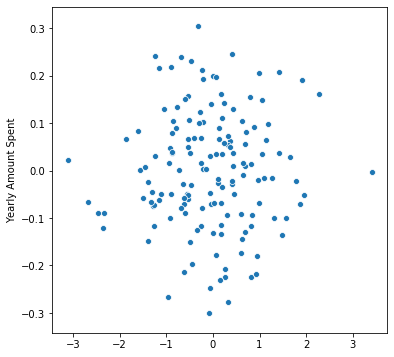

In [47]:
#draw scatterplot
plt.figure(figsize=(6,6))
sns.scatterplot(y_pred,residual)
plt.show()

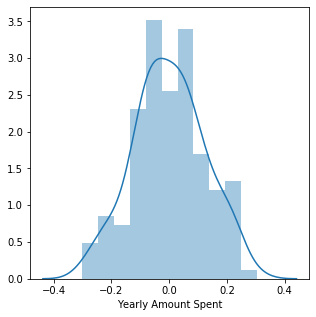

In [48]:
plt.figure(figsize=(5,5))
sns.distplot(residual)
plt.show()

In [49]:
#dataset fulfil linear regression assumption
'''Avg. Session Length","Time on App","Time on Website","Length of Membership---these features are play important role 
to maximize the Yearly Amount spent by the customers'''
# r2-score is great i.e., r2-score=0.9853 which is close to 1


'Avg. Session Length","Time on App","Time on Website","Length of Membership---these features are play important role \nto maximize the Yearly Amount spent by the customers'